In [43]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [44]:
model = resnet50(weights='ResNet50_Weights.DEFAULT')
model.eval()
target_layers = [model.layer4[-1]]

In [46]:
img_path = "../data/figure_data/dog_and_cat.jpg"
rgb_img = np.array(Image.open(img_path).convert("RGB"))
rgb_img_resized = np.array(Image.open(img_path).convert("RGB").resize((224, 224)))

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(Image.fromarray(rgb_img_resized)).unsqueeze(0)

In [ ]:
with torch.no_grad():
    outputs = model(input_tensor)
    predicted_class = outputs.argmax().item()

targets = [ClassifierOutputTarget(predicted_class)]

with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]

    visualization = show_cam_on_image(rgb_img_resized.astype(np.float32)/255, grayscale_cam, use_rgb=True)

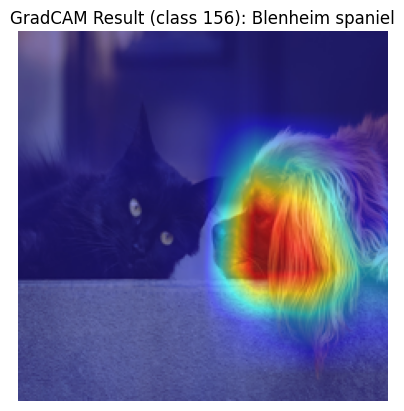

In [48]:
plt.imshow(visualization)
plt.title(f"GradCAM Result (class {predicted_class}): Blenheim spaniel")
plt.axis('off')
plt.savefig("../outputs/gradcam_dog_cat.pdf")
plt.show()

### Get predicted Class

In [49]:
import json
import urllib.request

url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = urllib.request.urlopen(url).read().decode("utf-8").splitlines()

print(labels[156])

Blenheim spaniel
